# Explaining transformer models using SHAP
## CHAPTER 07 - *Practical exposure of using SHAP in ML*

From **Applied Machine Learning Explainability Techniques** by [**Aditya Bhattacharya**](https://www.linkedin.com/in/aditya-bhattacharya-b59155b6/), published by **Packt**

### Objective

The goal of this notebook is to explore model explainability of deep learning image classification models using SHAP. Please check out *Chapter 7 - Practical exposure of using SHAP in ML* for other interesting approaches of using SHAP in practice.

### Installing the modules

Install the following libraries in Google Colab or your local environment, if not already installed.

In [ ]:
!pip install --upgrade pandas numpy matplotlib seaborn tensorflow shap scikit-image

### Loading the modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import json

import shap
print(f"Shap version used: {shap.__version__}")

Shap version used: 0.40.0


In [2]:
print(f" Version of tensorflow used: {tf.__version__}")

 Version of tensorflow used: 2.3.1


In [3]:
import tensorflow.compat.v1.keras.backend as K
tf.compat.v1.disable_eager_execution()
print('Disable Eager Execution for SHAP to work')

Disable Eager Execution for SHAP to work


### Using Gradient Explainers in SHAP

In [4]:
X,y = shap.datasets.imagenet50(resolution=224)

In [30]:
inference_image = X[[46]] # Let's choose an image from SHAP datasets

In [31]:
model = VGG19(weights='imagenet') # Let's use VGG19 as our model

In [32]:
layer_num = 10 # Let's analyze the 10th layer

In [33]:
# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    '''
    Source : https://github.com/slundberg/shap
    '''
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

In [34]:
model_input = (model.layers[layer_num].input, model.layers[-1].output)
explainer = shap.GradientExplainer(model_input,
                                   map2layer(X, layer_num),
                                   local_smoothing=0)

In [35]:
shap_values, ind = explainer.shap_values(map2layer(inference_image, layer_num), ranked_outputs=4)

In [36]:
# load the ImageNet class names
def load_imagenet_classes(path, inds):
    with open(path) as f:
        classes = json.load(f)
    
    class_names = np.vectorize(lambda x: classes[str(x)][1])(inds)
    return classes, class_names

imagenet_classes, class_names = load_imagenet_classes('datasets/imagenet_class_index.json', ind)

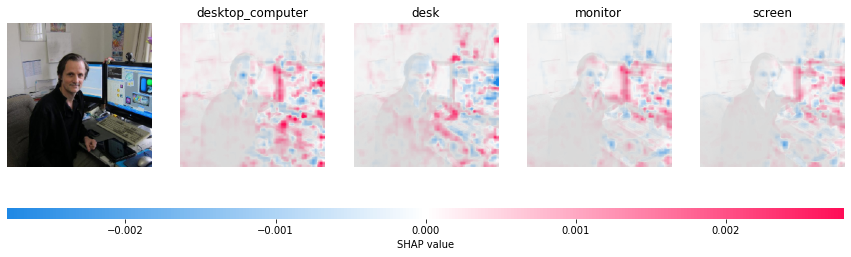

In [37]:
# plot the explanations
shap.image_plot(shap_values, inference_image, class_names)

## Final Thoughts

## Reference

1. SHAP GitHub Project - https://github.com/slundberg/shap
2. SHAP Documentations - https://shap.readthedocs.io/en/latest/index.html
3. SHAP Image Explainers - https://github.com/slundberg/shap/tree/master/notebooks/image_examples/image_classification
4. Some of the utility functions and code are taken from the GitHub Repository of the author - Aditya Bhattacharya https://github.com/adib0073